In [1]:
from solver import Solver, Region
from numpy import random
import pickle
import os.path as path
import numpy as np 
from bioproc.proc_models import *   
from bioproc.proc_opt import *
from bioproc.hill_functions import *
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
import os.path 
from deap import creator, base, tools, algorithms  
import seaborn as sns

sns.set_style("white")

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Candidate", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("candidate", Solver.generateCandidate) 

In [3]:
file =  os.path.join(".", "bioproc", "one_bit_model", "bioprocViableSet_IterGA.p")    
viablePoints1 = np.array(pickle.load(open(file, "rb")))     
number1 = np.size(viablePoints1, 0) 
rndPoints = np.array(np.random.randint(number1, size=20)) 
points1 = viablePoints1[rndPoints]

In [4]:
file =  os.path.join(".", "bioproc", "two_bit_model", "bioprocViableSet_IterGA.p")    
viablePoints2 = np.array(pickle.load(open(file, "rb")))     
number2 = np.size(viablePoints2, 0) 
rndPoints = np.array(np.random.randint(number2, size=20)) 
points2 = viablePoints2[rndPoints]

In [5]:
file =  os.path.join(".", "bioproc", "three_bit_model", "bioprocViableSet_IterGA.p")    
viablePoints3 = np.array(pickle.load(open(file, "rb")))     
number3 = np.size(viablePoints3, 0) 
rndPoints = np.array(np.random.randint(number3, size=20)) 
points3 = viablePoints3[rndPoints]

In [6]:
number = np.array([number1, number2, number3])
points = np.array([points1, points2, points3])
viablePoints = np.array([viablePoints1, viablePoints2, viablePoints3])

In [7]:
dt = 0.001 
T = 192 #hours 
N = int(T/dt)    
ts = np.linspace(0, T, N)   


clk = get_clock(ts)

In [8]:
def plot_points(axes, points, n_bits = 2, plot_clock=True, plot_q = False):
    
    for i, (a,p) in enumerate(zip(axes, points)):
       
        params_ff = p[0:8]        
        params_addr = p[8:]  
        
    
        
        if n_bits == 1 or (n_bits == 0 and i == 0):
            y0 = np.array([0]*6)  
            Y = odeint(one_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
            
            i1 = Y[:,-2]         
            i2 = Y[:,-1]        
            
            q = Y[:,2]       
            

            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            if plot_q:
                a.plot(ts, q, label='q') 
            if plot_clock:
                a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
            a.set_xlabel("time [h]")
            a.legend(loc='upper left')       
            
            
        elif n_bits == 2 or (n_bits == 0 and i == 1):
            y0 = np.array([0]*12)  
            Y = odeint(two_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
        
            i1 = Y[:,-4]         
            i2 = Y[:,-3]        
            i3 = Y[:,-2]  
            i4 = Y[:,-1]   

            q1 = Y[:,2]       
            q2 = Y[:,6]        


            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            a.plot(ts, i3, label='i3')
            a.plot(ts, i4, label='i4')
            if plot_q:
                a.plot(ts, q1, label='q1') 
                a.plot(ts, q2, label='q2') 
            if plot_clock:
                a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
            a.set_xlabel("time [h]")
            a.legend(loc='upper left')       
        elif n_bits == 3 or (n_bits == 0 and i == 2):
            
            y0 = np.array([0]*18)  
            Y = odeint(three_bit_processor_ext, y0, ts, args=(params_ff, params_addr)) 
        
            i1 = Y[:,-6]         
            i2 = Y[:,-5]        
            i3 = Y[:,-4]  
            i4 = Y[:,-3]   
            i5 = Y[:,-2]   
            i6 = Y[:,-1]   
            
            q1 = Y[:,2]       
            q2 = Y[:,6]        
            q3 = Y[:,10]


            a.plot(ts, i1, label='i1')
            a.plot(ts, i2, label='i2')
            a.plot(ts, i3, label='i3')
            a.plot(ts, i4, label='i4')
            a.plot(ts, i5, label='i5')
            a.plot(ts, i6, label='i6')
            if plot_q:
                a.plot(ts, q1, label='q1') 
                a.plot(ts, q2, label='q2') 
                a.plot(ts, q3, label='q3') 
            if plot_clock:
                a.plot(ts, clk, 'k', alpha = 0.5, label='clk') 
            a.set_xlabel("time [h]")
            a.legend(loc='upper left')       
        
            
            
    axes[0].set_ylabel("Concetrations")
    plt.gcf().set_size_inches(15,5)
    plt.savefig('figs\\proc_'+str(n_bits)+'_ODE.pdf', bbox_inches = 'tight')
    plt.show()
    np.savetxt('figs\\proc_'+str(n_bits)+'.txt', points)
        
        
    

## Plot feasible solutions for each topology
Make plots and save them to ```/figs``` folder together with the parameter values

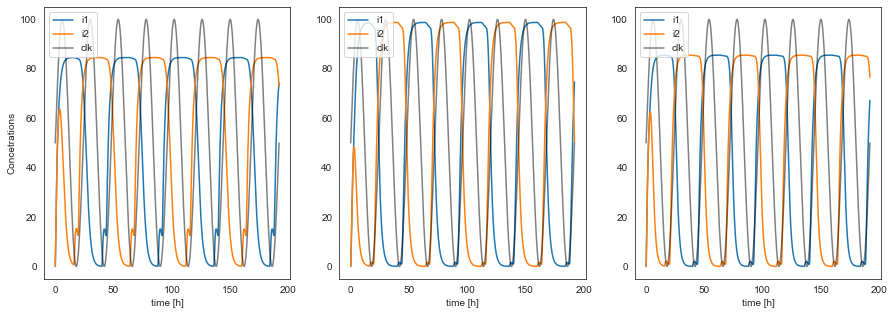

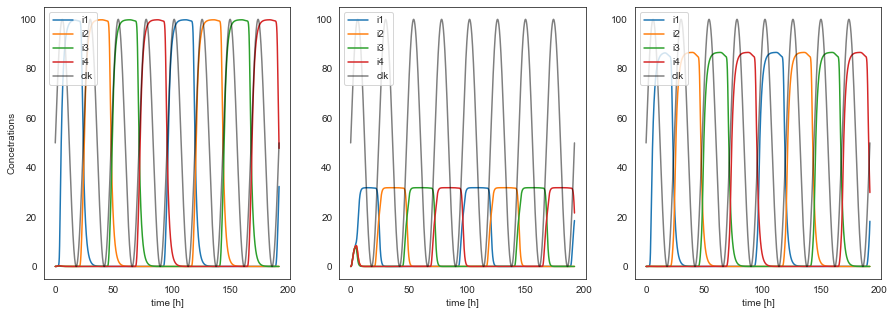

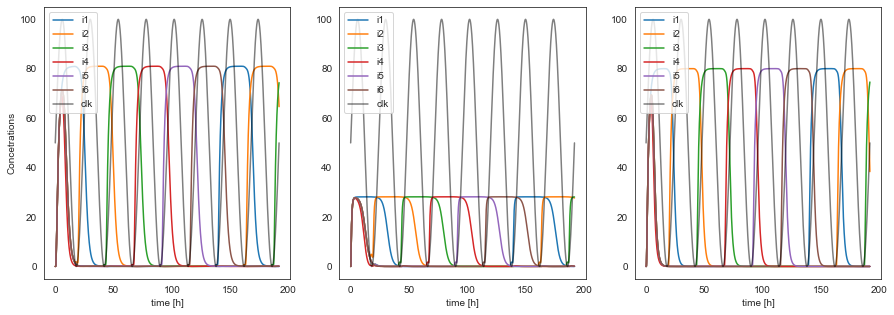

In [9]:
for n_bits in range(1,4):
    i = n_bits-1
    
    rndPoints = np.array(np.random.randint(number[i], size=3)) 
    points = viablePoints[i][rndPoints]
    #points = np.loadtxt('selected_points.txt')

    ax1=plt.subplot(1, 3, 1)
    ax2=plt.subplot(1, 3, 2, sharey = ax1)
    ax3=plt.subplot(1, 3, 3, sharey = ax1)
    plot_points([ax1, ax2, ax3], points[:3], n_bits=n_bits)
    



## Plot non-feasible solutions
Generate random solutions

In [10]:
parameter_values = {  "transcription": {"min": 0.01, "max": 50},   
                "translation": {"min": 0.01, "max": 50},  
                "protein_production": {"min": 0.1, "max": 50},           
                "rna_degradation": {"min": 0.1, "max": 100},        
                "protein_degradation": {"min": 0.001, "max": 50},         
                "hill": {"min": 1, "max": 5},         
                "Kd": {"min": 0.01, "max": 250}, 
                "protease_concentration": {"min": 10, "max":1000}
                }    
model = BioProc(parameter_values, np.array(["protein_production", "protein_production", "protein_production", "protein_production", "protein_degradation", "protein_degradation", "Kd","hill", "protein_production", "protein_degradation", "Kd", "hill"]), np.array([0]*12), avg_dev=50, fake_clock=True)               
solver = Solver(model)                      

-480000


C:\Users\miham\.conda\envs\opt\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\miham\.conda\envs\opt\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Candidate' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [28]:
points = np.array([]).reshape((0,12))
for i in range(3):
    points = np.vstack([points,np.array(solver.generateCandidate())])


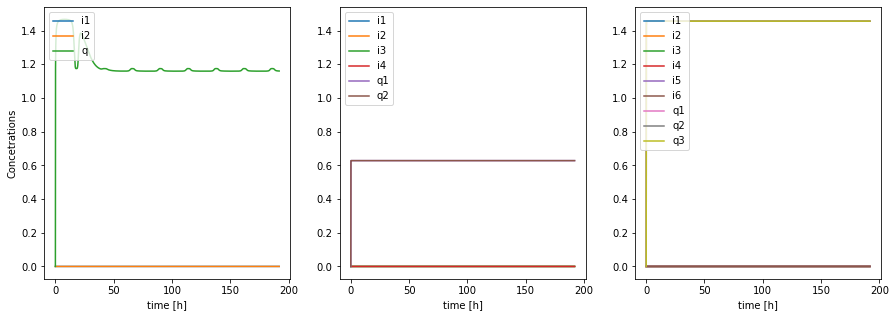

In [29]:
ax1=plt.subplot(1, 3, 1)
ax2=plt.subplot(1, 3, 2, sharey = ax1)
ax3=plt.subplot(1, 3, 3, sharey = ax1)
plot_points([ax1, ax2, ax3], points[:3], n_bits=0, plot_clock=False)